In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'jet'

In [3]:
import sys
sys.path.append('../')
from Model import Model, Optimizer, Target
import numpy as np
import matplotlib.pyplot as plt

# Single unit activations

Text(0.5,1,'x')

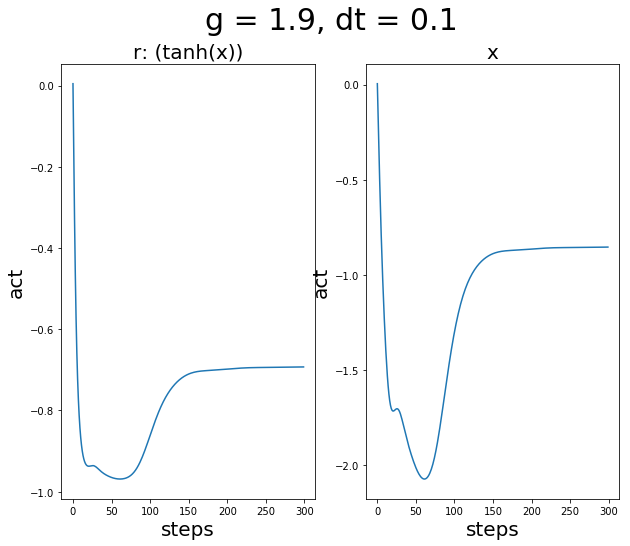

In [4]:
model = Model(num_neurons=120,g_res=1.9,dt=0.1)
for i in range(300):
    model.step()
    
condition = 'g = 1.9, dt = 0.1'
    
plt.subplot(1,2,1)
plt.suptitle(condition,fontsize=30)
plt.plot(np.asarray(model.r_res_hist)[:,0,0])

plt.xlabel('steps',fontsize=20)
plt.ylabel('act',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(1,2,2)
plt.plot(np.asarray(model.x_res_hist)[:,0])

plt.xlabel('steps',fontsize=20)
plt.ylabel('act',fontsize=20)
plt.title('x',fontsize=20)



Text(0.5,1,'x')

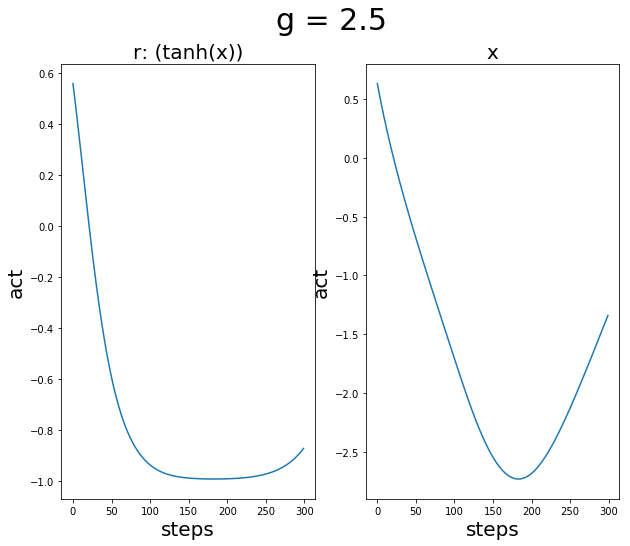

In [5]:
model = Model(num_neurons=120,g_res=2.5,dt=0.01)
for i in range(300):
    model.step()
    
condition = 'g = 2.5'
    
plt.subplot(1,2,1)
plt.suptitle(condition,fontsize=30)
plt.plot(np.asarray(model.r_res_hist)[:,0,0])

plt.xlabel('steps',fontsize=20)
plt.ylabel('act',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(1,2,2)
plt.plot(np.asarray(model.x_res_hist)[:,0])

plt.xlabel('steps',fontsize=20)
plt.ylabel('act',fontsize=20)
plt.title('x',fontsize=20)



# Spectral Radius Variants

Text(0.5,1,'x')

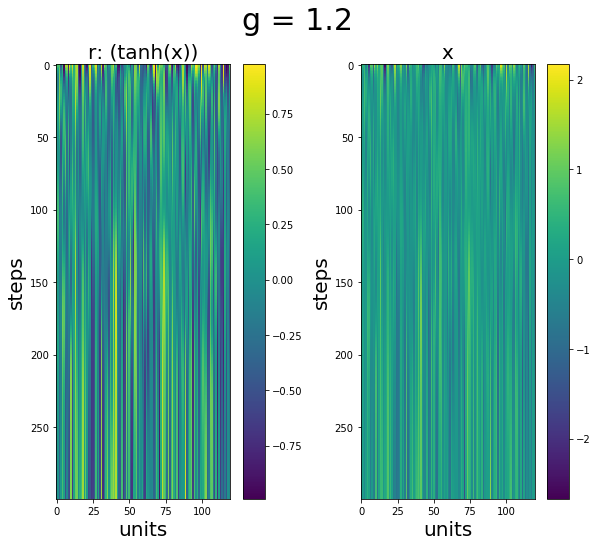

In [6]:
model = Model(num_neurons=120,g_res=1.2,dt=0.1)
for i in range(300):
    model.step()
    
condition = 'g = 1.2'
    
plt.subplot(1,2,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0],cmap='viridis')
plt.colorbar()
plt.xlabel('units',fontsize=20)
plt.ylabel('steps',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(1,2,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:],cmap='viridis')
plt.colorbar()
plt.xlabel('units',fontsize=20)
plt.ylabel('steps',fontsize=20)
plt.title('x',fontsize=20)



Text(0.5,1,'x')

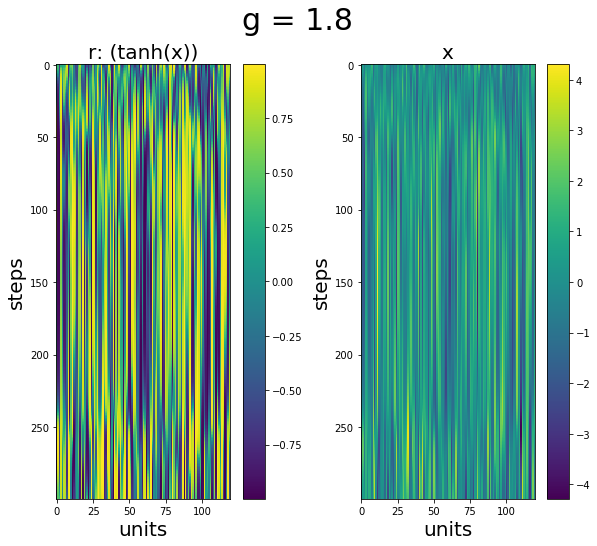

In [7]:
model = Model(num_neurons=120,g_res=1.8,dt=0.1)
for i in range(300):
    model.step()
    
condition = 'g = 1.8'
    
plt.subplot(1,2,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0],cmap='viridis')
plt.colorbar()
plt.xlabel('units',fontsize=20)
plt.ylabel('steps',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(1,2,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:],cmap='viridis')
plt.colorbar()
plt.xlabel('units',fontsize=20)
plt.ylabel('steps',fontsize=20)
plt.title('x',fontsize=20)

Text(0.5,1,'x')

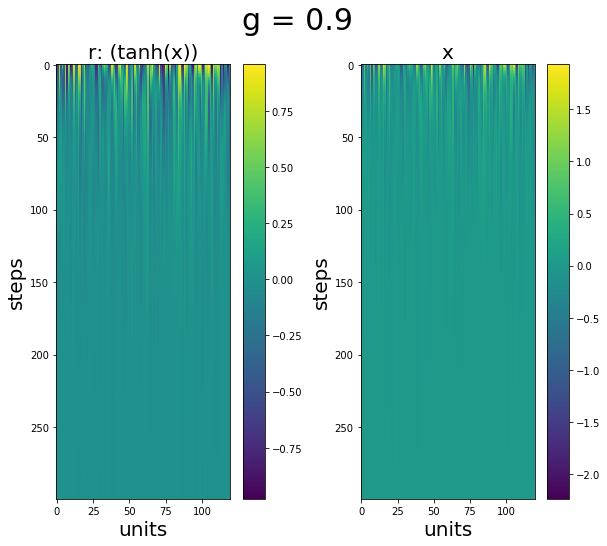

In [8]:
model = Model(num_neurons=120,g_res=0.9,dt=0.1)
for i in range(300):
    model.step()
    
condition = 'g = 0.9'
    
plt.subplot(1,2,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0],cmap='viridis')
plt.colorbar()
plt.xlabel('units',fontsize=20)
plt.ylabel('steps',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(1,2,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:],cmap='viridis')
plt.colorbar()
plt.xlabel('units',fontsize=20)
plt.ylabel('steps',fontsize=20)
plt.title('x',fontsize=20)

# Train on Sine Wave / No Feedback


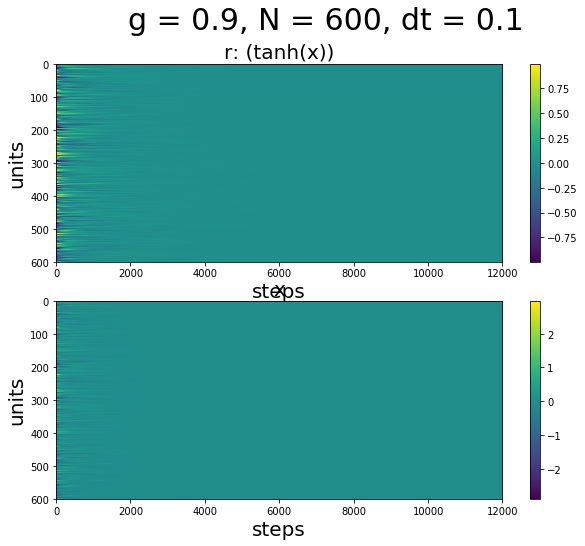

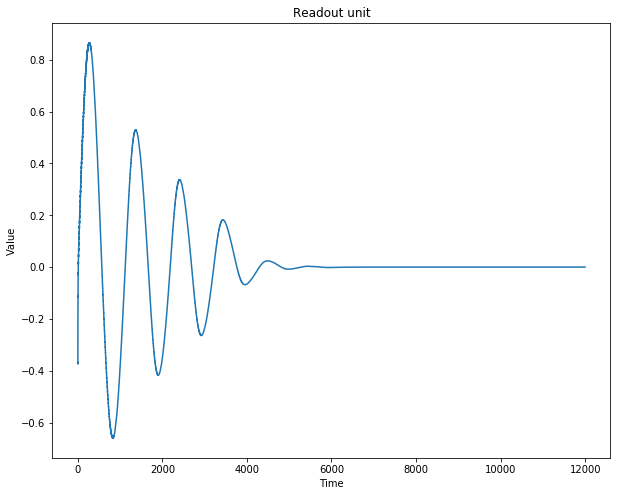

In [9]:
epochs = 30
train_interval = 2
updates = 200

opt = Optimizer()
model = Model(num_neurons=600,g_res=0.9,dt=.01)
condition = 'g = 0.9, N = 600, dt = 0.1'

for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step()
            
        target = Target(model.t)
        model.w_out, error = opt.update(model.w_out,model.r_res,target)
        
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()


Text(0.5,0,'steps')

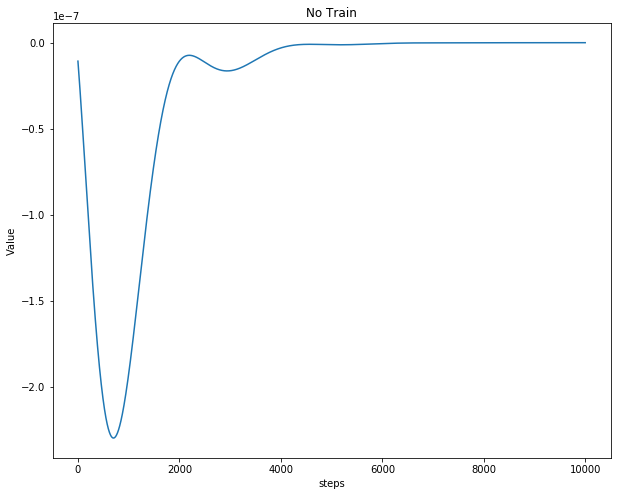

In [10]:
model.reset_history()
for i in range(10000):
    model.step()
    
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.title('No Train')
plt.ylabel('Value')
plt.xlabel('steps')

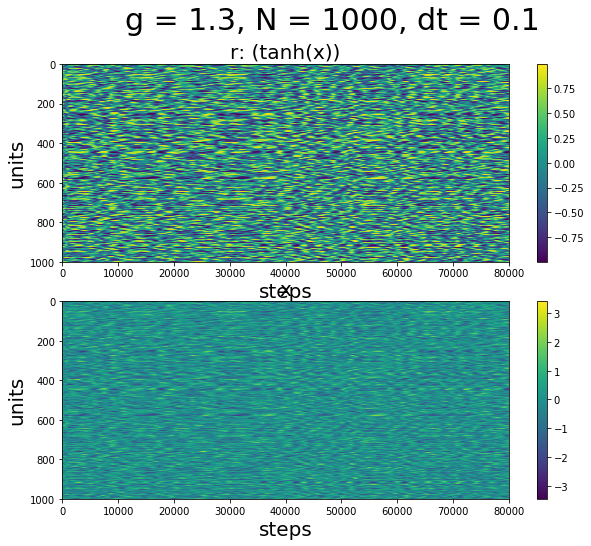

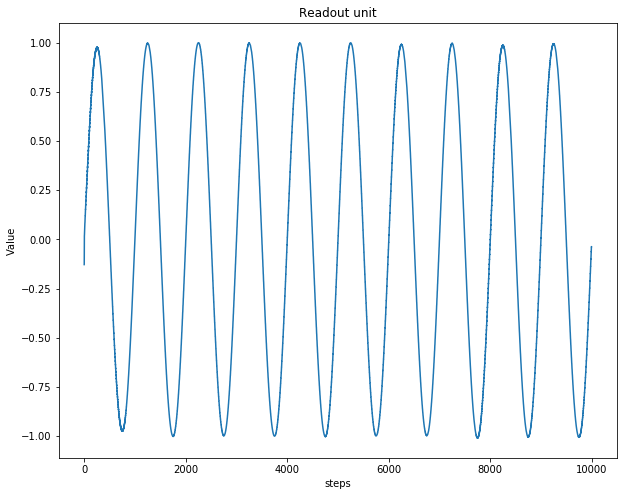

In [15]:
epochs = 200
train_interval = 2
updates = 200

opt = Optimizer()
model = Model(num_neurons=1000,g_res=1.3,dt=.01)


for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step()
            
        target = Target(model.t)
        model.w_out, error = opt.update(model.w_out,model.r_res,target)

condition = 'g = 1.3, N = 1000, dt = 0.1'
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

condition = 'g = 1.3, N = 1000, dt = 0.1'

plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:10000,0,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('steps')
plt.show()



Text(0.5,0,'steps')

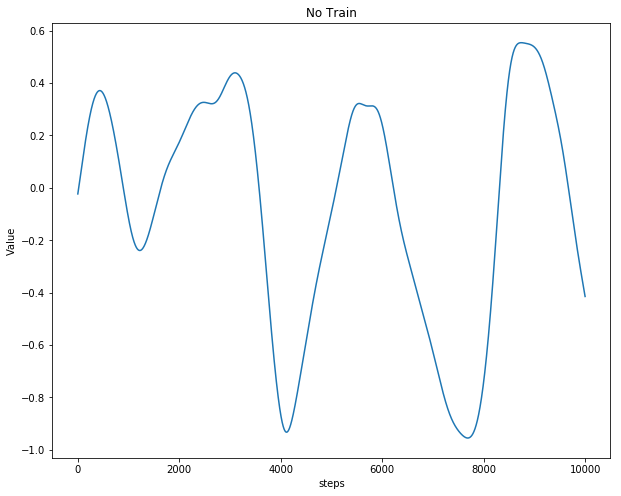

In [16]:
model.reset_history()
for i in range(10000):
    model.step()
    
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.title('No Train')
plt.ylabel('Value')
plt.xlabel('steps')

# Models with Feedbacks

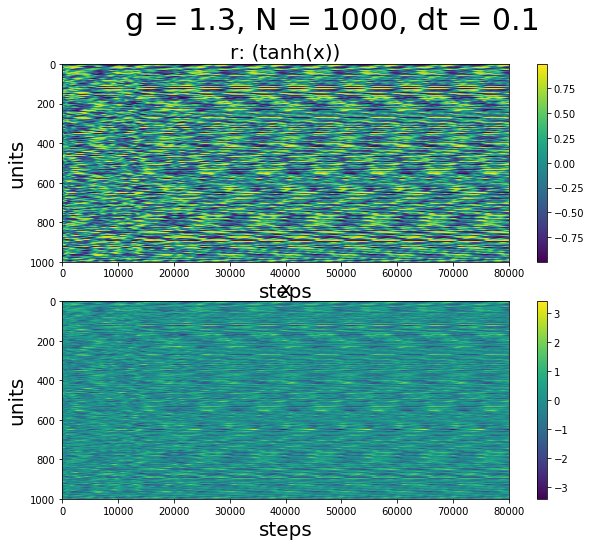

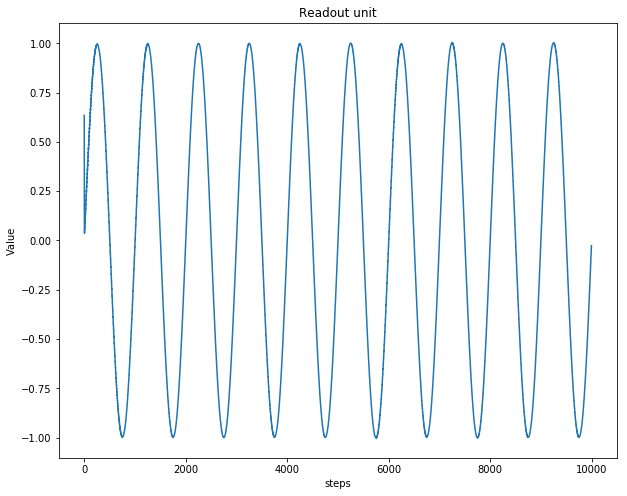

In [17]:
epochs = 200
train_interval = 2
updates = 200

opt = Optimizer()
model = Model(num_neurons=1000,g_res=1.3,dt=.01)


for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step(feedback=True)
            
        target = Target(model.t)
        model.w_out, error = opt.update(model.w_out,model.r_res,target)

condition = 'g = 1.3, N = 1000, dt = 0.1'
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

condition = 'g = 1.3, N = 1000, dt = 0.1'

plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:10000,0,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('steps')
plt.show()



Text(0.5,0,'steps')

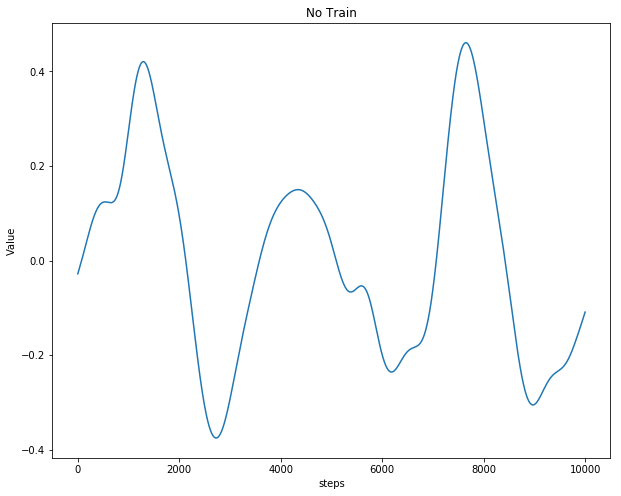

In [18]:
model.reset_history()
for i in range(10000):
    model.step()
    
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.title('No Train')
plt.ylabel('Value')
plt.xlabel('steps')

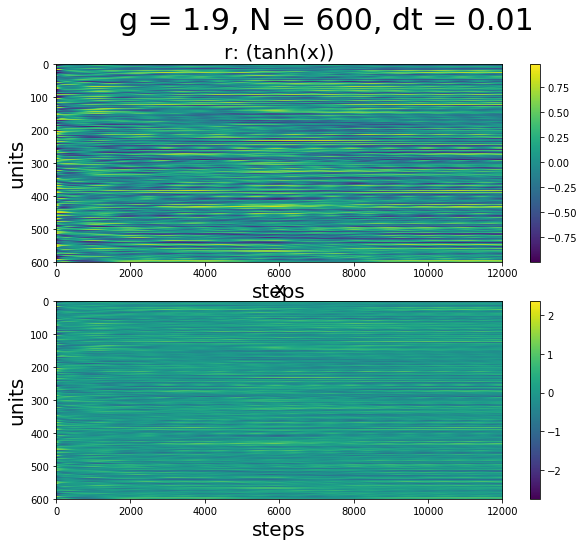

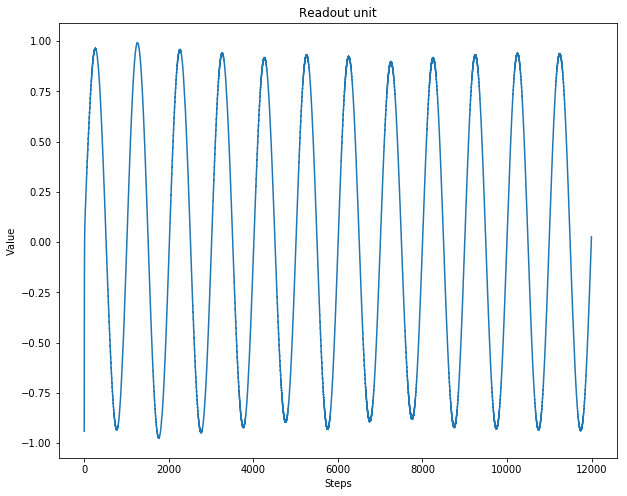

In [268]:
epochs = 30
train_interval = 2
updates = 200

opt = Optimizer()
model = Model(num_neurons=600,g_res=1.1,dt=0.01)
condition = 'g = 1.9, N = 600, dt = 0.01'

for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step(feedback=True)
            
        target = Target(model.t)
        model.w_out, error = opt.update(model.w_out,model.r_res,target)
        
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('Steps')
plt.show()



# Multiple Outputs with Feedback?

# Push the Limits

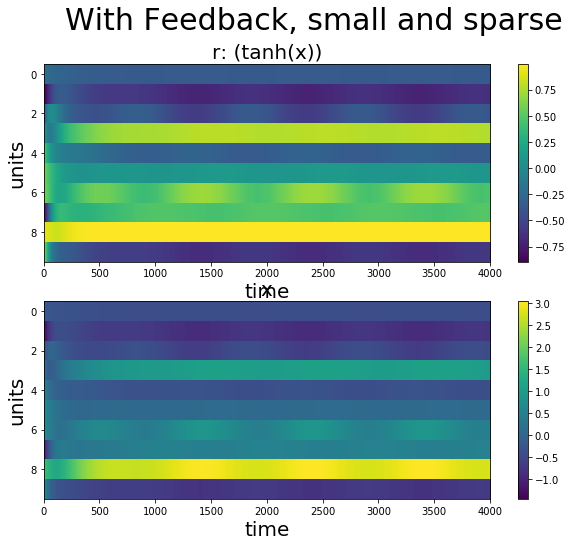

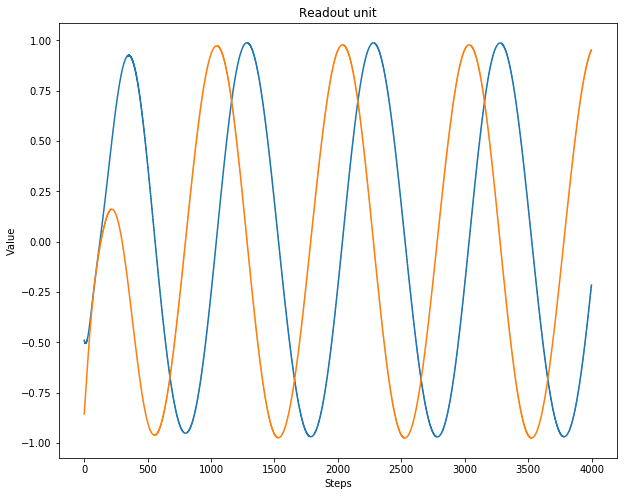

In [58]:
epochs = 20
train_interval = 2
updates = 100

opt = Optimizer()
model = Model(num_neurons=10,sparsity=0.2,g_res=1.1,dt=0.01,output_size=2)
condition = 'With Feedback, small and sparse'

for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step(feedback=True)
            
        target1 = Target(model.t,targ_type='sine')
        target2 = Target(model.t,targ_type='cosine')
        wout1, error = opt.update(np.expand_dims(model.w_out[:,0],axis=1),model.r_res,target1)
        wout2, error = opt.update(np.expand_dims(model.w_out[:,1],axis=1),model.r_res,target2)
  
        model.w_out = np.concatenate([wout1,wout2],axis=1)
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

plt.colorbar()
plt.xlabel('time',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('time',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.plot(np.asarray(model.y_hist)[:,1,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('Steps')
plt.show()



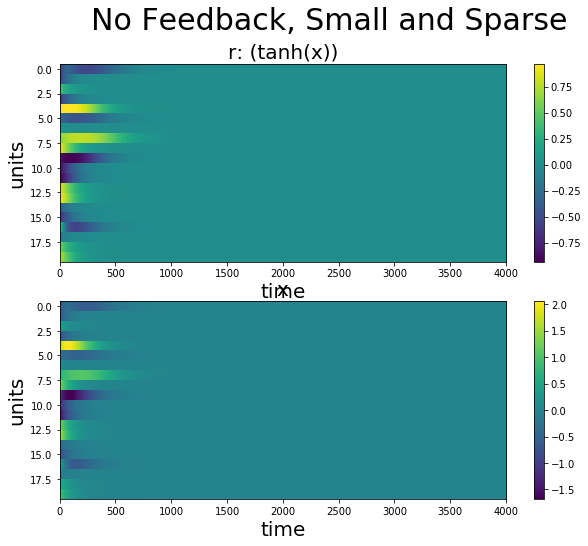

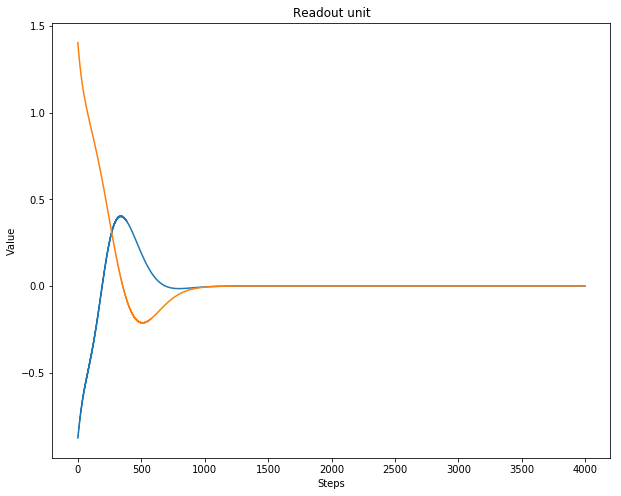

In [317]:
epochs = 20
train_interval = 2
updates = 100

opt = Optimizer()
model = Model(num_neurons=20,sparsity=0.02,g_res=1.3,dt=0.01,output_size=2)
condition = 'No Feedback, Small and Sparse'

for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step(feedback=False)
            
        target1 = Target(model.t,targ_type='sine')
        target2 = Target(model.t,targ_type='cosine')
        wout1, error = opt.update(np.expand_dims(model.w_out[:,0],axis=1),model.r_res,target1)
        wout2, error = opt.update(np.expand_dims(model.w_out[:,1],axis=1),model.r_res,target2)
  
        model.w_out = np.concatenate([wout1,wout2],axis=1)
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

plt.colorbar()
plt.xlabel('time',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('time',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.plot(np.asarray(model.y_hist)[:,1,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('Steps')
plt.show()



Fails without feedback in small networks, sparse connectivity

# Back to  one output, modulate with input

Text(0.5,0,'Steps')

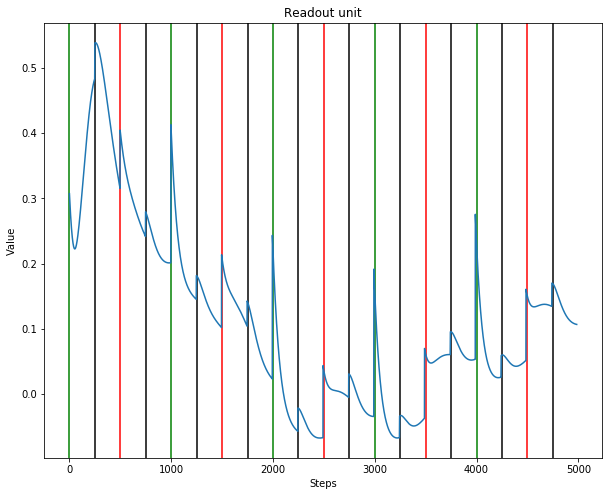

In [410]:
inp = []
inp2 = []
inp3 = []
numstep=5000
for i in range(numstep):
    if i % 1000 == 0:
        inp.append(16)
        plt.axvline(x=i,color='g')
    elif i % 500 == 0:
        inp2.append(14)
        plt.axvline(x=i,color='r')
    elif i % 250 == 0:
        inp3.append(7)
        plt.axvline(x=i,color='k')
    else:
        inp.append(0)
        inp2.append(0)
        inp3.append(0)
        
model = Model(input_size=3)
for i in range(len(inp)):
    model.step(act_in = np.asarray([inp[i],inp2[i],inp3[i]]))
    
plt.plot(np.asarray(model.y_hist)[:,0,0])

plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('Steps')



In [ ]:
epochs = 10
train_interval = 2
updates = 200

opt = Optimizer()
model = Model(num_neurons=200,g_res=1.2,dt=.01)
condition = 'g = 1.9, N = 600, dt = 0.1'

for i in range(epochs*train_interval)

for epoch in range(epochs):
    for update in range(updates):
        for step in range(train_interval):
            model.step()
            
        target = Target(model.t)
        model.w_out, error = opt.update(model.w_out,model.r_res,target)
        
plt.subplot(2,1,1)
plt.suptitle(condition,fontsize=30)
plt.imshow(np.asarray(model.r_res_hist)[:,:,0].T,cmap='viridis',interpolation='nearest', aspect='auto')

plt.colorbar()
plt.xlabel('Steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('r: (tanh(x))',fontsize=20)

plt.subplot(2,1,2)
plt.imshow(np.asarray(model.x_res_hist)[:,:].T,cmap='viridis',interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xlabel('Steps',fontsize=20)
plt.ylabel('units',fontsize=20)
plt.title('x',fontsize=20)
            
plt.show()
plt.plot(np.asarray(model.y_hist)[:,0,0])
plt.title('Readout unit')
plt.ylabel('Value')
plt.xlabel('Steps')
plt.show()

